In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/MDS project/df_gpt4.csv')

df = df.dropna(subset=['cleaned text'])

df = df[df["Main panel_x"] == "A"]


In [ ]:
def map_labels(label):
    if label in [0, 1, 2, 3, 4, 5]:
        return 0
    elif label in [6, 7]:
        return 1
    elif label == 8:
        return 2
    else:
        return label

df['3 Class Labels'] = df['9 Class Labels'].apply(map_labels)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

training_set, testing_set = train_test_split(df, test_size=0.3, random_state=42)

training_set

Institution name Main panel_x  \
93                        The University of East Anglia            A   
2617                             The University of Bath            A   
874                            University of Sunderland            A   
2747                        The University of Liverpool            A   
5719                             The University of Bath            A   
...                                                 ...          ...   
4785  Imperial College of Science, Technology and Me...            A   
5026                        The University of Sheffield            A   
6027                               University of Exeter            A   
3891                             Bournemouth University            A   
5002                              University of Bristol            A   

      Unit of assessment number_x  \
93                            5.0   
2617                          5.0   
874                           3.0   
2747                          4.0   
5719                          4.0   
...                           ...   
4785                          1.0   
5026                          3.0   
6027                          1.0   
3891                          4.0   
5002                          2.0   

                                Unit of assessment name  \
93                                  Biological Sciences   
2617                                Biological Sciences   
874   Allied Health Professions, Dentistry, Nursing ...   
2747            Psychology, Psychiatry and Neuroscience   
5719            Psychology, Psychiatry and Neuroscience   
...                                                 ...   
4785                                  Clinical Medicine   
5026  Allied Health Professions, Dentistry, Nursing ...   
6027                                  Clinical Medicine   
3891            Psychology, Psychiatry and Neuroscience   
5002    Public Health, Health Services and Primary Care   

                                                  Title Summary impact type  \
93    A continuously enhanced human experimental mod...       Technological   
2617  Impact of evolutionary biology research on com...       Environmental   
874   Changing professional practice and improving h...              Health   
2747  Improving access to psychological therapies fo...              Health   
5719  The development and evaluation of a self-help ...              Health   
...                                                 ...                 ...   
4785    Reducing the burden of viral hepatitis globally              Health   
5026  Safely reducing hospital transfers for older p...              Health   
6027  Transforming Amish healthcare services through...              Health   
3891  Mental health in early fatherhood: evidence-ba...              Health   
5002  Rolling programme of research, centred on the ...              Health   

                                              Countries  \
93                                                  NaN   
2617                                       [Cape Verde]   
874                                                 NaN   
2747  [India];[Nepal];[Pakistan];[Peru];[Sri Lanka];...   
5719                       [Australia];[United Kingdom]   
...                                                 ...   
4785                                                NaN   
5026                                                NaN   
6027  [UK];[Austria];[Belgium];[Bulgaria];[Croatia];...   
3891                                   [United Kingdom]   
5002                                                NaN   

                                        Formal partners  \
93                              [Hoya Surgical optics ]   
2617               [Maio Biodiversity Foundation (FMB)]   
874                                                 NaN   
2747  [Human Development Research Foundation, Pakistan]   
5719                                                NaN   
...     

In [ ]:
import pandas as pd
import tensorflow
from nltk.tokenize import regexp_tokenize, sent_tokenize
from nltk import pos_tag_sents
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np
import re
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')


#Dictionary of contractions for replacement

contractions = {
          "ain't": "am not",
          "aren't": "are not",
          "can't": "cannot",
          "can't've": "cannot have",
          "'cause": "because",
          "could've": "could have",
          "couldn't": "could not",
          "couldn't've": "could not have",
          "didn't": "did not",
          "doesn't": "does not",
          "don't": "do not",
          "hadn't": "had not",
          "hadn't've": "had not have",
          "hasn't": "has not",
          "haven't": "have not",
          "he'd": "he would",
          "he'd've": "he would have",
          "he'll": "he will",
          "he'll've": "he will have",
          "he's": "he is",
          "how'd": "how did",
          "how'd'y": "how do you",
          "how'll": "how will",
          "how's": "how is",
          "i'd": "i would",
          "i'd've": "i would have",
          "i'll": "i will",
          "i'll've": "i will have",
          "i'm": "i am",
          "i've": "i have",
          "isn't": "is not",
          "it'd": "it had",
          "it'd've": "it would have",
          "it'll": "it will",
          "it'll've": "it will have",
          "it's": "it is",
          "let's": "let us",
          "ma'am": "madam",
          "mayn't": "may not",
          "might've": "might have",
          "mightn't": "might not",
          "mightn't've": "might not have",
          "must've": "must have",
          "mustn't": "must not",
          "mustn't've": "must not have",
          "needn't": "need not",
          "needn't've": "need not have",
          "o'clock": "of the clock",
          "oughtn't": "ought not",
          "oughtn't've": "ought not have",
          "shan't": "shall not",
          "sha'n't": "shall not",
          "shan't've": "shall not have",
          "she'd": "she would",
          "she'd've": "she would have",
          "she'll": "she will",
          "she'll've": "she will have",
          "she's": "she is",
          "should've": "should have",
          "shouldn't": "should not",
          "shouldn't've": "should not have",
          "so've": "so have",
          "so's": "so is",
          "that'd": "that would",
          "that'd've": "that would have",
          "that's": "that is",
          "there'd": "there had",
          "there'd've": "there would have",
          "there's": "there is",
          "they'd": "they would",
          "they'd've": "they would have",
          "they'll": "they will",
          "they'll've": "they will have",
          "they're": "they are",
          "they've": "they have",
          "to've": "to have",
          "wasn't": "was not",
          "we'd": "we had",
          "we'd've": "we would have",
          "we'll": "we will",
          "we'll've": "we will have",
          "we're": "we are",
          "we've": "we have",
          "weren't": "were not",
          "what'll": "what will",
          "what'll've": "what will have",
          "what're": "what are",
          "what's": "what is",
          "what've": "what have",
          "when's": "when is",
          "when've": "when have",
          "where'd": "where did",
          "where's": "where is",
          "where've": "where have",
          "who'll": "who will",
          "who'll've": "who will have",
          "who's": "who is",
          "who've": "who have",
          "why's": "why is",
          "why've": "why have",
          "will've": "will have",
          "won't": "will not",
          "won't've": "will not have",
          "would've": "would have",
          "wouldn't": "would not",
          "wouldn't've": "would not have",
          "y'all": "you all",
          "y'alls": "you alls",
          "y'all'd": "you all would",
          "y'all'd've": "you all would have",
          "y'all're": "you all are",
          "y'all've": "you all have",
          "you'd": "you had",
          "you'd've": "you would have",
          "you'll": "you you will",
          "you'll've": "you you will have",
          "you're": "you are",
          "you've": "you have"
            }

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import string

from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
stopwords_set = set(stopwords.words('english'))
punctuation_set = set(string.punctuation)


def penn_to_wordnet(penn_pos_tag):
    """
    Function to convert Penn Treebank part-of-speech tags to corresponding WordNet tags.
    """
    tag_dictionary = {
        'NN': 'n', 'NNS': 'n', 'NNP': 'n', 'NNPS': 'n',
        'JJ': 'a', 'JJR': 'a', 'JJS': 'a',
        'VB': 'v', 'VBD': 'v', 'VBG': 'v', 'VBN': 'v', 'VBP': 'v', 'VBZ': 'v',
        'RB': 'r', 'RBR': 'r', 'RBS': 'r',
        'MD': 'v'
    }

    return tag_dictionary.get(penn_pos_tag[:2], "n")

def preprocess_text(text):
    """
    Function to preprocess text: lowercasing, removing punctuation, expanding contractions, lemmatization, etc.
    """
    if not isinstance(text, str):
        return ""

    text = text.lower()

    text = re.sub(r'(.)\1{2,}', r'\1', text)

    text = re.sub(r"http\S+", " ", text)

    text = re.sub("<.*?>", "", text)

    text = re.sub(r'\.(?![ .])', '. ', text)

    text = re.sub(r'<br />', ' ', text)

    text = re.sub(r'\d+', '', text)

    text = re.sub(r'\b(?=.*\d)(?=.*[a-zA-Z]).*?\b', '', text)

    text = re.sub(r'\b\d+(\.\d+)?', '', text)

    tokenized_sentences = [regexp_tokenize(sent, pattern="\s+", gaps=True) for sent in sent_tokenize(text)]

    new_sentences = []

    for sentences in pos_tag_sents(tokenized_sentences):
        new_sentence = []
        for word, tag in sentences:
            if word not in punctuation_set and word not in stopwords_set:
                if word in contractions:
                    words = contractions[word].split(" ")
                    new_sentence.extend(words)
                else:
                    wordnet_pos = penn_to_wordnet(tag)
                    lemmatized_word = wnl.lemmatize(word, pos=wordnet_pos)
                    lemmatized_word = re.sub(r'[^\w\s]', '', lemmatized_word)

                    if lemmatized_word and len(lemmatized_word) > 2:
                        new_sentence.append(lemmatized_word)

        if new_sentence:
            new_sentences.append(new_sentence)

    return new_sentences

In [ ]:
from sklearn.utils import shuffle
import nlpaug.augmenter.word as naw
import pandas as pd
import numpy as np
from tqdm import tqdm

def augment_text(df, samples, class_id):
    contextual_aug = naw.ContextualWordEmbsAug(model_path='bert-base-uncased', action='substitute', device='cuda')
    np.random.seed(42)

    df_minority = df[df["3 Class Labels"] == class_id].reset_index(drop=True)

    new_rows = []

    for i in tqdm(np.random.randint(0, len(df_minority), samples)):
        row_copy = df_minority.iloc[i].copy()

        paragraphs = row_copy['cleaned text'].split('\n')

        augmented_paragraphs = []

        for paragraph in paragraphs:
            if paragraph.strip():  # Ensure the paragraph is not empty
                augmented_paragraph = contextual_aug.augment(paragraph)
                augmented_paragraphs.append(augmented_paragraph[0])
            else:
                augmented_paragraphs.append(paragraph)  # Preserve empty lines

        row_copy['cleaned text'] = '\n'.join(augmented_paragraphs)

        new_rows.append(row_copy)

    new_df = pd.DataFrame(new_rows)

    df_augmented = pd.concat([df, new_df]).reset_index(drop=True)

    seed = 42
    df_augmented = shuffle(df_augmented, random_state=seed)

    return df_augmented

augmented_df = augment_text(training_set, 200, 0)
augmented_df = augment_text(augmented_df, 250, 2)

ModuleNotFoundError: No module named 'nlpaug'

In [ ]:
import pandas as pd
from tqdm import tqdm

tqdm.pandas()

augmented_df["sentence tokenized"] = augmented_df["cleaned text"].progress_apply(lambda x: preprocess_text(x))

testing_set["sentence tokenized"] = testing_set["cleaned text"].progress_apply(lambda x: preprocess_text(x))


100%|██████████| 405/405 [00:32<00:00, 12.60it/s]


In [ ]:
def flatten(sents_tokenized):
    return [word for sentence in sents_tokenized for word in sentence]

def tokens_to_string(tokens):
    return ' '.join(tokens)


augmented_df["word tokenized"] = augmented_df["sentence tokenized"].apply(lambda x: flatten(x))

augmented_df["string"] = augmented_df["word tokenized"].apply(lambda x: tokens_to_string(x))


testing_set["word tokenized"] = testing_set["sentence tokenized"].apply(lambda x: flatten(x))

testing_set["string"] = testing_set["word tokenized"].apply(lambda x: tokens_to_string(x))

In [ ]:
#pip install sentence_transformers

In [ ]:
import multiprocessing
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import sent_tokenize
from tqdm import tqdm
import pandas as pd
import numpy as np
import warnings
import torch

tqdm.pandas()

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Load the model and move it to the specified device
model = SentenceTransformer('paraphrase-MiniLM-L6-v2', device=device)


def get_lexical_cohesion_sentence(text):
    text = sent_tokenize(text)
    embeddings = model.encode(text)
    similarity_matrix = cosine_similarity(embeddings)
    adjacent_similarities = np.diag(similarity_matrix, k=1)
    mean_similarity = adjacent_similarities.mean()
    std_dev_similarity = adjacent_similarities.std()
    mean_similarity_all_pairs = np.mean(similarity_matrix[np.triu_indices_from(similarity_matrix, k=1)])
    std_dev_similarity_all_pairs = np.std(similarity_matrix[np.triu_indices_from(similarity_matrix, k=1)])

    return {
        "mean_similarity_adjacent": mean_similarity,
        "std_dev_similarity_adjacent": std_dev_similarity,
        "mean_similarity_all_pairs": mean_similarity_all_pairs,
        "std_dev_similarity_all_pairs": std_dev_similarity_all_pairs,
    }

def get_lexical_cohesion_paragraphs(text):
    paragraphs = re.split(r'\n\s*\n', text.strip())
    embeddings = model.encode(paragraphs)
    similarity_matrix = cosine_similarity(embeddings)
    adjacent_similarities = np.diag(similarity_matrix, k=1)
    mean_similarity_adjacent = adjacent_similarities.mean()
    std_dev_similarity_adjacent = adjacent_similarities.std()
    upper_triangle_indices = np.triu_indices_from(similarity_matrix, k=1)
    mean_similarity_all_pairs = np.mean(similarity_matrix[upper_triangle_indices])
    std_dev_similarity_all_pairs = np.std(similarity_matrix[upper_triangle_indices])

    return {
        "mean_similarity_adjacent": mean_similarity_adjacent,
        "std_dev_similarity_adjacent": std_dev_similarity_adjacent,
        "mean_similarity_all_pairs": mean_similarity_all_pairs,
        "std_dev_similarity_all_pairs": std_dev_similarity_all_pairs,
    }



def batch_apply(df, func, batch_size=10):
    results = []
    batches = [df.iloc[i:i + batch_size] for i in range(0, len(df), batch_size)]

    for batch in tqdm(batches):
        batch_results = batch['cleaned text'].apply(func)
        results.append(batch_results)

    return pd.concat(results, ignore_index=True)

sentence_cohesion_df_1 = batch_apply(augmented_df, lambda text: get_lexical_cohesion_sentence(text), batch_size=10)
paragraph_cohesion_df_1 = batch_apply(augmented_df, lambda text: get_lexical_cohesion_paragraphs(text), batch_size=10)

sentence_cohesion_df_2 = batch_apply(testing_set, lambda text: get_lexical_cohesion_sentence(text), batch_size=10)
paragraph_cohesion_df_2 = batch_apply(testing_set, lambda text: get_lexical_cohesion_paragraphs(text), batch_size=10)

Using device: cuda


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
100%|██████████| 41/41 [00:04<00:00,  9.16it/s]


In [ ]:
import pandas as pd

sentence_cohesion_df_1 = batch_apply(augmented_df, lambda text: get_lexical_cohesion_sentence(text), batch_size=10)
paragraph_cohesion_df_1 = batch_apply(augmented_df, lambda text: get_lexical_cohesion_paragraphs(text), batch_size=10)

sentence_cohesion_df_2 = batch_apply(testing_set, lambda text: get_lexical_cohesion_sentence(text), batch_size=10)
paragraph_cohesion_df_2 = batch_apply(testing_set, lambda text: get_lexical_cohesion_paragraphs(text), batch_size=10)

sentence_cohesion_flattened_1 = pd.json_normalize(sentence_cohesion_df_1)
paragraph_cohesion_flattened_1 = pd.json_normalize(paragraph_cohesion_df_1)

sentence_cohesion_flattened_2 = pd.json_normalize(sentence_cohesion_df_2)
paragraph_cohesion_flattened_2 = pd.json_normalize(paragraph_cohesion_df_2)

sentence_cohesion_flattened_1 = sentence_cohesion_flattened_1.add_prefix('sentence_')
paragraph_cohesion_flattened_1 = paragraph_cohesion_flattened_1.add_prefix('paragraph_')

sentence_cohesion_flattened_2 = sentence_cohesion_flattened_2.add_prefix('sentence_')
paragraph_cohesion_flattened_2 = paragraph_cohesion_flattened_2.add_prefix('paragraph_')

df_combined_1 = pd.concat([augmented_df.reset_index(drop=True), sentence_cohesion_flattened_1, paragraph_cohesion_flattened_1], axis=1)
df_combined_2 = pd.concat([testing_set.reset_index(drop=True), sentence_cohesion_flattened_2, paragraph_cohesion_flattened_2], axis=1)

100%|██████████| 41/41 [00:04<00:00,  9.15it/s]


In [ ]:
#pip install textstat

In [ ]:
import textstat

df_combined_1['Flesch Reading Ease'] = df_combined_1['cleaned text'].apply(textstat.flesch_reading_ease)
df_combined_1['SMOG Index'] = df_combined_1['cleaned text'].apply(textstat.smog_index)
df_combined_1['Automated Readability Index'] = df_combined_1['cleaned text'].apply(textstat.automated_readability_index)
df_combined_1['Dale Chall Readability Score'] = df_combined_1['cleaned text'].apply(textstat.dale_chall_readability_score)

df_combined_2['Flesch Reading Ease'] = df_combined_2['cleaned text'].apply(textstat.flesch_reading_ease)
df_combined_2['SMOG Index'] = df_combined_2['cleaned text'].apply(textstat.smog_index)
df_combined_2['Automated Readability Index'] = df_combined_2['cleaned text'].apply(textstat.automated_readability_index)
df_combined_2['Dale Chall Readability Score'] = df_combined_2['cleaned text'].apply(textstat.dale_chall_readability_score)

In [ ]:
train = df_combined_1
test = df_combined_2


In [ ]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords, brown
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import torch
import torch.nn.functional as F
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import pos_tag, ngrams
import numpy as np
import pandas as pd
from tqdm import tqdm
from transformers import BertTokenizer

nltk.download('brown')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

stop_words = set(stopwords.words("english"))

model_name = "cardiffnlp/twitter-roberta-base-sentiment"

tokenizer = AutoTokenizer.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = AutoModelForSequenceClassification.from_pretrained(model_name).to(device)

sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, device=device)

brown_words = brown.words()
word_frequencies = Counter(brown_words)

threshold = 5
common_word_threshold = 200

rare_words = {word.lower() for word, freq in word_frequencies.items() if freq < threshold}
high_frequency_words = {word.lower() for word, freq in word_frequencies.items() if freq > common_word_threshold}

common_words_list = stop_words.union(high_frequency_words)
common_words_list = sorted(common_words_list)

label_to_score = {"negative": -1, "neutral": 0, "positive": 1}

labels = ["negative", "neutral", "positive"]

transition_words = set([
    'however', 'therefore', 'thus', 'hence', 'consequently', 'moreover', 'furthermore',
    'additionally', 'alternatively', 'similarly', 'likewise', 'nevertheless', 'nonetheless',
    'for example', 'for instance', 'in addition', 'on the other hand', 'by contrast',
    'in conclusion', 'to summarize', 'in summary', 'accordingly', 'as a result', 'in fact',
    'in other words', 'namely', 'that is', 'such as', 'including', 'particularly', 'especially',
    'specifically', 'notably', 'above all', 'in particular', 'also', 'besides', 'plus',
    'what\'s more', 'conversely', 'although', 'even though', 'yet', 'instead', 'unlike',
    'because', 'so', 'for this reason', 'due to', 'to illustrate', 'equally', 'in the same way',
    'overall', 'ultimately', 'in brief', 'to sum up', 'in short', 'indeed', 'in fact',
    'certainly', 'undoubtedly', 'clearly'
])

def tokenize(text, tokenizer):
    tokens = tokenizer(
        text,
        return_tensors="pt",
        truncation=True,
        padding="max_length",
        max_length=512,
        return_overflowing_tokens=True).input_ids

    return tokens


def handcrafted_features(text):

  input_ids = tokenize(text, tokenizer)

  texts = tokenizer.batch_decode(input_ids, skip_special_tokens=True)

  sentiment_scores = []

  for text_2 in texts:

    tokenized_input = tokenizer(text_2, truncation=True, max_length=500, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model(**tokenized_input)

    logits = outputs.logits

    probabilities = F.softmax(logits, dim=1)

    sentiment_score = sum(label_to_score[label] * prob for label, prob in zip(labels, probabilities[0].tolist()))

    sentiment_scores.append(sentiment_score)

  sentiment_score = np.mean(sentiment_scores)

  words = word_tokenize(text)

  sentences = sent_tokenize(text)

  pos_tags = nltk.pos_tag(words)

  pos_counts = Counter(tag for word, tag in pos_tags)

  noun_count = sum(1 for word, tag in pos_tags if tag.startswith('NN'))

  verb_count = sum(1 for word, tag in pos_tags if tag.startswith('VB'))

  adj_count = sum(1 for word, tag in pos_tags if tag.startswith('JJ'))

  adv_count = sum(1 for word, tag in pos_tags if tag.startswith('RB'))

  conj_count = sum(1 for word, tag in pos_tags if tag.startswith('CC'))

  foreign_count = sum(1 for word, tag in pos_tags if tag.startswith('FW'))

  paragraph_count = len([l for l in text.split('\n') if l.strip()])

  sentence_count = len(sentences)

  word_count = len(words)

  character_count = len(text)

  transition_word_count = sum(1 for word in words if word in transition_words)

  pronoun_count = sum(1 for word, tag in pos_tags if tag in ['PRP', 'PRP$'])

  referential_cohesion = pronoun_count / noun_count if noun_count > 0 else 0

  avg_word_length = sum(len(word) for word in words) / len(words) if len(words) > 0 else 0

  avg_sentence_length = sum(len(sent.split()) for sent in sentences) / len(sentences) if len(sentences) > 0 else 0

  avg_word_per_sentence = word_count / sentence_count if sentence_count > 0 else 0

  number_of_stopwords = sum(1 for word in words if word in stop_words)

  advanced_words = [word for word in words if word not in common_words_list and len(word) > 7]

  lexical_sophistication = len(advanced_words) / len(words) if words else 0

  rare_word_count = sum(1 for word in words if word in rare_words)

  rare_word_frequency = rare_word_count / len(words) if words else 0

  content_words = [word for word, pos in pos_tags if pos.startswith(('NN', 'VB', 'JJ', 'RB'))]

  lexical_density = len(content_words) / len(words) if words else 0

  transition_to_sentence_ratio = transition_word_count / sentence_count if sentence_count > 0 else 0

  transition_to_par_ratio = transition_word_count / paragraph_count if paragraph_count > 0 else 0

  bigrams = list(ngrams(words, 2))

  trigrams = list(ngrams(words, 3))

  bigram_counts = len(Counter(bigrams))
  trigram_counts = len(Counter(trigrams))




  return {
      "Sentiment Score": sentiment_score,
      "Noun Count": noun_count,
      "Verb Count": verb_count,
      "Adjective Count": adj_count,
      "Adverb Count": adv_count,
      "Conjunction Count": conj_count,
      "Foreign Word Count": foreign_count,
      "Paragraph Count": paragraph_count,
      "Sentence Count": sentence_count,
      "Word Count": word_count,
      "Transition Word Count": transition_word_count,
      "Referential Cohesion": referential_cohesion,
      "Average Word Length": avg_word_length,
      "Average Sentence Length": avg_sentence_length,
      "Average Words per Sentence": avg_word_per_sentence,
      "Number of Stopwords": number_of_stopwords,
      "Lexical Sophistication": lexical_sophistication,
      "Lexical Density": lexical_density,
      "Lexical Sophistication": lexical_sophistication,
      "Sentence conjuctive cohesion": transition_to_sentence_ratio,
      "Paragraph conjuctive cohesion": transition_to_par_ratio,
      "Bigram Count": bigram_counts,
      "Trigram Count": trigram_counts,

  }


def extract_all_features_in_batches(df, batch_size=100):
    features_list = []

    with tqdm(total=len(df), desc="Processing batches") as pbar:
        for start in range(0, len(df), batch_size):
            end = min(start + batch_size, len(df))
            batch = df.iloc[start:end]

            features_batch = batch["cleaned text"].apply(handcrafted_features).apply(pd.Series)
            features_list.append(features_batch)

            # Update progress bar
            pbar.update(len(batch))

    # Concatenate all features into a single DataFrame
    result_df = pd.concat(features_list, axis=0).reset_index(drop=True)

    return result_df

# Apply the feature extraction and merge with the original DataFrame

features_df_1 = extract_all_features_in_batches(train)
train_df = pd.concat([train.reset_index(drop=True), features_df_1], axis=1)

features_df_2 = extract_all_features_in_batches(test)
test_df = pd.concat([test.reset_index(drop=True), features_df_2], axis=1)

train_df



[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Processing batches: 100%|██████████| 405/405 [00:44<00:00,  9.03it/s]


Institution name Main panel_x  \
0                        University of Dundee            A   
1                        University of Oxford            A   
2     Cardiff University / Prifysgol Caerdydd            A   
3               University of Nottingham, The            A   
4                The University of Birmingham            A   
...                                       ...          ...   
1390               University of Salford, The            A   
1391                  University of Greenwich            A   
1392                     University of Oxford            A   
1393                  The University of Essex            A   
1394            The University of East Anglia            A   

      Unit of assessment number_x  \
0                             5.0   
1                             5.0   
2                             4.0   
3                             2.0   
4                             4.0   
...                           ...   
1390                          3.0   
1391                          3.0   
1392                          4.0   
1393                          5.0   
1394                          2.0   

                                Unit of assessment name  \
0                                   Biological Sciences   
1                                   Biological Sciences   
2               Psychology, Psychiatry and Neuroscience   
3       Public Health, Health Services and Primary Care   
4               Psychology, Psychiatry and Neuroscience   
...                                                 ...   
1390  Allied Health Professions, Dentistry, Nursing ...   
1391  Allied Health Professions, Dentistry, Nursing ...   
1392            Psychology, Psychiatry and Neuroscience   
1393                                Biological Sciences   
1394    Public Health, Health Services and Primary Care   

                                                  Title Summary impact type  \
0     Delivery of new and repurposed drugs for visce...       Technological   
1     Life-changing treatments and clinical tools fo...              Health   
2     Public engagement as a vital facilitator of po...       Environmental   
3     Implementing PINCER to reduce medication error...              Health   
4     Influencing UK policy to reduce the harmful im...            Societal   
...                                                 ...                 ...   
1390  Improving healthcare systems to tackle antimic...              Health   
1391  Impact of research on ?Super-Recognisers? on t...       Technological   
1392  Improving mental health and wellbeing through ...              Health   
1393  Restoring European Native Oysters through evid...       Environmental   
1394  Enabling the NHS to meet diverse needs across ...              Health   

                                              Countries  \
0     [Worldwide];[Worldwide];[Worldwide];[Worldwide...   
1                  [UK];[France];[USA];[Europe];[Italy]   
2                                       [Great Britain]   
3                                             [England]   
4                                      [United Kingdom]   
...                                                 ...   
1390                                           [Uganda]   
1391                    [England];[Germany];[Australia]   
1392                                         [UK];[USA]   
1393                                          [England]   
1394                                          [England]   

                                        Formal partners  \
0     [DNDi];[GSK];[DNDi];[GSK];[DNDi];[GSK];[DNDi];...   
1                                           [Orphazyme]   
2                                                   NaN   
3     [University of Dundee];[University of Edinburg...   
4                                                   NaN   
...                                                 ...   
1390  [Fort Portal Regional Referral Hospital (FPRRH...   


In [ ]:
new_column_names = {
    'sentence_mean_similarity_adjacent': 'Mean Similarity of Adjacent Sentences',
    'sentence_std_dev_similarity_adjacent': 'Variation in Similarity of Adjacent Sentences',
    'sentence_mean_similarity_all_pairs': 'Mean Similarity Across All Sentence Pairs',
    'sentence_std_dev_similarity_all_pairs': 'Variation in Similarity Across All Sentence Pairs',
    'paragraph_mean_similarity_adjacent': 'Mean Similarity of Adjacent Paragraphs',
    'paragraph_std_dev_similarity_adjacent': 'Variation in Similarity of Adjacent Paragraphs',
    'paragraph_mean_similarity_all_pairs': 'Mean Similarity Across All Paragraph Pairs',
    'paragraph_std_dev_similarity_all_pairs': 'Variation in Similarity Across All Paragraph Pairs'
}

train_df = train_df.rename(columns=new_column_names)

test_df = test_df.rename(columns=new_column_names)

test_df

Institution name Main panel_x  Unit of assessment number_x  \
0    University of Nottingham, The            A                          2.0   
1     The University of Manchester            A                          2.0   
2            University of Glasgow            A                          4.0   
3     The University of Birmingham            A                          3.0   
4             Cranfield University            A                          6.0   
..                             ...          ...                          ...   
400    University of Hertfordshire            A                          4.0   
401            University of Keele            A                          2.0   
402    Sheffield Hallam University            A                          5.0   
403            Kingston University            A                          3.0   
404    The University of Sheffield            A                          3.0   

                               Unit of assessment name  \
0      Public Health, Health Services and Primary Care   
1      Public Health, Health Services and Primary Care   
2              Psychology, Psychiatry and Neuroscience   
3    Allied Health Professions, Dentistry, Nursing ...   
4            Agriculture, Food and Veterinary Sciences   
..                                                 ...   
400            Psychology, Psychiatry and Neuroscience   
401    Public Health, Health Services and Primary Care   
402                                Biological Sciences   
403  Allied Health Professions, Dentistry, Nursing ...   
404  Allied Health Professions, Dentistry, Nursing ...   

                                                 Title Summary impact type  \
0    Development and implementation of UK tobacco c...              Health   
1    Radical reorganisation of trauma services redu...              Health   
2    Imaging-based diagnostics for patient selectio...              Health   
3             eLearning for safer prescribing practice            Societal   
4          Reducing Food Waste by Controlling Ethylene       Technological   
..                                                 ...                 ...   
400  Do Something Different: achieving positive beh...            Societal   
401  Raising the international quality of osteoarth...              Health   
402  Antimicrobial materials: better outcomes for o...              Health   
403  Bridges: advancing the spread of self-manageme...              Health   
404  Influencing guidelines and dental practice on ...              Health   

                                             Countries  \
0                                     [UNITED KINGDOM]   
1                                       [UK];[UK];[UK]   
2          [United Kingdom];[Europe];[USA];[Australia]   
3    [England];[Wales];[Northern Ireland];[Malta];[...   
4    [North America, South America, Europe, Africa,...   
..                                                 ...   
400                                                NaN   
401                                                NaN   
402  [England];[Scotland];[Ireland];[Spain];[Italy]...   
403              [England ];[Northern Ireland];[Wales]   
404                                                NaN   

                                       Formal partners  \
0              [Royal College of Physicians of London]   
1     [London School of Hygiene and Tropical Medicine]   
2    [NHS Scotland Greater Glasgow and Clyde Health...   
3                                                  NaN   
4    [Green Pac UK Ltd., Univeg Katope Ltd., World ...   
..                                                 ...   
400                                                NaN   
401                          [OAI Study Investigators]   
402  [Sheffield Teaching Hospitals NHS Foundation T...   
403                                                NaN   
404                                                NaN   

                             

In [ ]:
pip install openai==0.28

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 3.3 MB/s eta 0:00:00


In [ ]:
import openai
import pandas as pd

openai.api_key = ''

def get_embedding(text, model="text-embedding-3-large"):
    text = text.replace("\n", " ")
    response = openai.Embedding.create(input=[text], model=model)
    return response['data'][0]['embedding']


#test_df['gpt_embedding'] = test_df['cleaned text'].apply(lambda x: get_embedding(x, model='text-embedding-3-large'))

#train_df['gpt_embedding'] = train_df['cleaned text'].apply(lambda x: get_embedding(x, model='text-embedding-3-large'))


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/MDS project/testing_df.csv')

train_df = pd.read_csv('/content/drive/MyDrive/MDS project/augmented_df.csv')

train_df

Institution name Main panel_x  \
0                        University of Dundee            A   
1                        University of Oxford            A   
2     Cardiff University / Prifysgol Caerdydd            A   
3               University of Nottingham, The            A   
4                The University of Birmingham            A   
...                                       ...          ...   
1390               University of Salford, The            A   
1391                  University of Greenwich            A   
1392                     University of Oxford            A   
1393                  The University of Essex            A   
1394            The University of East Anglia            A   

      Unit of assessment number_x  \
0                             5.0   
1                             5.0   
2                             4.0   
3                             2.0   
4                             4.0   
...                           ...   
1390                          3.0   
1391                          3.0   
1392                          4.0   
1393                          5.0   
1394                          2.0   

                                Unit of assessment name  \
0                                   Biological Sciences   
1                                   Biological Sciences   
2               Psychology, Psychiatry and Neuroscience   
3       Public Health, Health Services and Primary Care   
4               Psychology, Psychiatry and Neuroscience   
...                                                 ...   
1390  Allied Health Professions, Dentistry, Nursing ...   
1391  Allied Health Professions, Dentistry, Nursing ...   
1392            Psychology, Psychiatry and Neuroscience   
1393                                Biological Sciences   
1394    Public Health, Health Services and Primary Care   

                                                  Title Summary impact type  \
0     Delivery of new and repurposed drugs for visce...       Technological   
1     Life-changing treatments and clinical tools fo...              Health   
2     Public engagement as a vital facilitator of po...       Environmental   
3     Implementing PINCER to reduce medication error...              Health   
4     Influencing UK policy to reduce the harmful im...            Societal   
...                                                 ...                 ...   
1390  Improving healthcare systems to tackle antimic...              Health   
1391  Impact of research on ?Super-Recognisers? on t...       Technological   
1392  Improving mental health and wellbeing through ...              Health   
1393  Restoring European Native Oysters through evid...       Environmental   
1394  Enabling the NHS to meet diverse needs across ...              Health   

                                              Countries  \
0     [Worldwide];[Worldwide];[Worldwide];[Worldwide...   
1                  [UK];[France];[USA];[Europe];[Italy]   
2                                       [Great Britain]   
3                                             [England]   
4                                      [United Kingdom]   
...                                                 ...   
1390                                           [Uganda]   
1391                    [England];[Germany];[Australia]   
1392                                         [UK];[USA]   
1393                                          [England]   
1394                                          [England]   

                                        Formal partners  \
0     [DNDi];[GSK];[DNDi];[GSK];[DNDi];[GSK];[DNDi];...   
1                                           [Orphazyme]   
2                                                   NaN   
3     [University of Dundee];[University of Edinburg...   
4                                                   NaN   
...                                                 ...   
1390  [Fort Portal Regional Referral Hospital (FPRRH...   


In [ ]:
pd.set_option('display.max_columns', None)

train_df

Institution name Main panel_x  \
0                        University of Dundee            A   
1                        University of Oxford            A   
2     Cardiff University / Prifysgol Caerdydd            A   
3               University of Nottingham, The            A   
4                The University of Birmingham            A   
...                                       ...          ...   
1390               University of Salford, The            A   
1391                  University of Greenwich            A   
1392                     University of Oxford            A   
1393                  The University of Essex            A   
1394            The University of East Anglia            A   

      Unit of assessment number_x  \
0                             5.0   
1                             5.0   
2                             4.0   
3                             2.0   
4                             4.0   
...                           ...   
1390                          3.0   
1391                          3.0   
1392                          4.0   
1393                          5.0   
1394                          2.0   

                                Unit of assessment name  \
0                                   Biological Sciences   
1                                   Biological Sciences   
2               Psychology, Psychiatry and Neuroscience   
3       Public Health, Health Services and Primary Care   
4               Psychology, Psychiatry and Neuroscience   
...                                                 ...   
1390  Allied Health Professions, Dentistry, Nursing ...   
1391  Allied Health Professions, Dentistry, Nursing ...   
1392            Psychology, Psychiatry and Neuroscience   
1393                                Biological Sciences   
1394    Public Health, Health Services and Primary Care   

                                                  Title Summary impact type  \
0     Delivery of new and repurposed drugs for visce...       Technological   
1     Life-changing treatments and clinical tools fo...              Health   
2     Public engagement as a vital facilitator of po...       Environmental   
3     Implementing PINCER to reduce medication error...              Health   
4     Influencing UK policy to reduce the harmful im...            Societal   
...                                                 ...                 ...   
1390  Improving healthcare systems to tackle antimic...              Health   
1391  Impact of research on ?Super-Recognisers? on t...       Technological   
1392  Improving mental health and wellbeing through ...              Health   
1393  Restoring European Native Oysters through evid...       Environmental   
1394  Enabling the NHS to meet diverse needs across ...              Health   

                                              Countries  \
0     [Worldwide];[Worldwide];[Worldwide];[Worldwide...   
1                  [UK];[France];[USA];[Europe];[Italy]   
2                                       [Great Britain]   
3                                             [England]   
4                                      [United Kingdom]   
...                                                 ...   
1390                                           [Uganda]   
1391                    [England];[Germany];[Australia]   
1392                                         [UK];[USA]   
1393                                          [England]   
1394                                          [England]   

                                        Formal partners  \
0     [DNDi];[GSK];[DNDi];[GSK];[DNDi];[GSK];[DNDi];...   
1                                           [Orphazyme]   
2                                                   NaN   
3     [University of Dundee];[University of Edinburg...   
4                                                   NaN   
...                                                 ...   
1390  [Fort Portal Regional Referral Hospital (FPRRH...   


In [ ]:
import ast

train_df["gpt_embedding"] = train_df["gpt_embedding"].apply(ast.literal_eval)
test_df["gpt_embedding"] = test_df["gpt_embedding"].apply(ast.literal_eval)

test_df["sentence tokenized"] = test_df["sentence tokenized"].apply(ast.literal_eval)
test_df["word tokenized"] = test_df["word tokenized"].apply(ast.literal_eval)

train_df["sentence tokenized"] = train_df["sentence tokenized"].apply(ast.literal_eval)
train_df["word tokenized"] = train_df["word tokenized"].apply(ast.literal_eval)



In [ ]:
X_train = np.vstack(train_df["gpt_embedding"].values)
y_train = train_df["3 Class Labels"].values

X_test = np.vstack(test_df["gpt_embedding"].values)
y_test = test_df["3 Class Labels"].values

X_train

array([[ 0.00764822,  0.04943441, -0.01559113, ..., -0.01050124,
        -0.01821644, -0.00239314],
       [ 0.00239255,  0.02920176, -0.01837814, ...,  0.00076223,
        -0.00310819, -0.00318441],
       [-0.00699307,  0.03243063, -0.0283682 , ..., -0.02619927,
         0.01470912,  0.00951058],
       ...,
       [ 0.00295471,  0.01407766, -0.02609214, ..., -0.01828406,
        -0.0126281 ,  0.00273238],
       [ 0.00066686,  0.00306777, -0.01089038, ..., -0.01939517,
        -0.00898681,  0.00696478],
       [ 0.01952402,  0.0207262 , -0.00944244, ..., -0.01921967,
         0.00834678,  0.00038828]])

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.4 MB/s eta 0:00:00


In [ ]:
pip install optuna-integration[xgboost]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.9/96.9 kB 9.3 MB/s eta 0:00:00


[I 2024-09-08 21:39:31,552] A new study created in memory with name: no-name-aba049ae-b199-4070-860d-064f4fd6ef27
[I 2024-09-08 21:39:41,603] Trial 0 finished with value: 0.7681998351105607 and parameters: {'eta': 0.030584288440389986, 'n_estimators': 375, 'learning_rate': 0.06302649902134558, 'max_depth': 5, 'min_child_weight': 36, 'subsample': 0.7069164967323635, 'colsample_bytree': 0.7079646412258987, 'gamma': 4.147384685762897, 'alpha': 0.017992340253663548, 'lambda': 0.1566479256794092}. Best is trial 0 with value: 0.7681998351105607.
[I 2024-09-08 21:39:50,030] Trial 1 finished with value: 0.20398009950248755 and parameters: {'eta': 0.06618168044598051, 'n_estimators': 594, 'learning_rate': 0.014215744460061797, 'max_depth': 10, 'min_child_weight': 178, 'subsample': 0.5477988416521398, 'colsample_bytree': 0.5196637024689097, 'gamma': 2.3465224906026902, 'alpha': 0.027901555028855225, 'lambda': 0.40770881440429474}. Best is trial 0 with value: 0.7681998351105607.
[I 2024-09-08 21:

Test Macro F1 Score: 0.5007324641014488


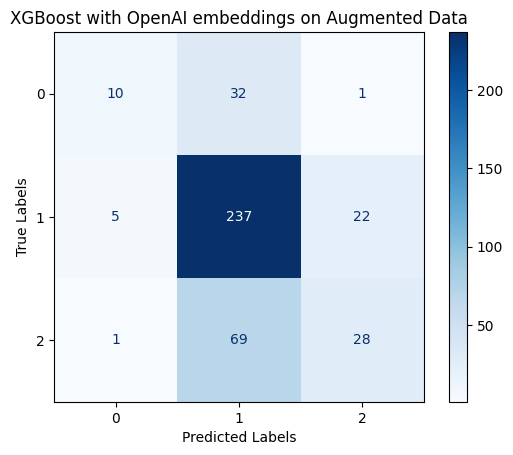

In [ ]:
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier, DMatrix, train as xgb_train
import optuna
from optuna.integration import XGBoostPruningCallback
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


def objective(trial):
    param = {
        'verbosity': 0,
        'objective': 'multi:softmax',
        'num_class': 3,
        'booster': 'gbtree',
        'eta': trial.suggest_float('eta', 0.01, 0.2, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 250),
        'subsample': trial.suggest_float('subsample', 0.5, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1),
        'gamma': trial.suggest_float('gamma', 0.0, 5),
        'alpha': trial.suggest_float('alpha', 0.01, 1.0, log=True),
        'lambda': trial.suggest_float('lambda', 0.01, 1.0, log=True),
        'eval_metric': 'mlogloss',
        'tree_method': 'gpu_hist',
        'gpu_id': 0
    }

    model = XGBClassifier(**param)

    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1_macro')

    return scores.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

best_params = study.best_trial.params

final_model = XGBClassifier(**best_params, tree_method='gpu_hist', gpu_id=0, use_label_encoder=False)

final_model.fit(X_train, y_train)

joblib.dump(final_model, 'best_model.pkl')

y_test_pred = final_model.predict(X_test)

test_macro_f1 = f1_score(y_test, y_test_pred, average='macro')
print("Test Macro F1 Score: {}".format(test_macro_f1))

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)

plt.title('XGBoost with OpenAI embeddings on Augmented Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')


plt.show()

In [ ]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 17.1 MB/s eta 0:00:00


In [ ]:
import shap

def predict_text_proba(embedding):

    #embedding = get_embedding(text, model="text-embedding-3-large")

    #embedding = np.array(embedding).reshape(1, -1)

    probabilities = final_model.predict_proba(embedding)

    return probabilities

def text_to_embedding(text):
    embedding = get_embedding(text, model="text-embedding-3-large")
    return np.array(embedding).reshape(1, -1)


text = test_df["cleaned text"][1]

embedding = get_embedding(text, model="text-embedding-3-large")

background_texts = test_df["cleaned text"][:100]

background_embeddings = np.array([get_embedding(text, model="text-embedding-3-large") for text in background_texts])

background_embeddings = background_embeddings.reshape(len(background_texts), -1)

explainer = shap.KernelExplainer(predict_text_proba, background_embeddings)


#import shap


#embedding_size = 3072

#masker = shap.maskers.Independent(np.zeros((1, embedding_size)))

#explainer = shap.Explainer(predict_batch_proba, masker = masker)

#texts = test_df["cleaned text"][:2].tolist()

#embeddings = np.array([get_embedding(text, model="text-embedding-3-large") for text in texts])

#embeddings = embeddings.reshape(len(texts), -1)

#shap_values = explainer(embeddings)

# Visualize SHAP values for a single instance (e.g., first text in the dataset)
#shap.plots.waterfall(shap_values[0])


In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=4e301e664edf5429065ff15e0b1c2bc6bad020c6e246bb90c4b29d37a6d62d61
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import numpy as np

class EmbeddingTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, embedding_model="text-embedding-3-large"):
        self.embedding_model = embedding_model

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return np.array([self.get_embedding(text) for text in X])

    def get_embedding(self, text):
        embedding = get_embedding(text, model=self.embedding_model)
        return embedding

pipeline = Pipeline([
    ('embedding', EmbeddingTransformer(embedding_model="text-embedding-3-large")),
    ('classifier', final_model)  # final_model should support predict_proba
])

texts = ["Your text 1", "Another text example"]
probabilities = pipeline.predict_proba(texts)
print(probabilities)

[[0.3641632  0.18661615 0.44922066]
 [0.5729626  0.13347894 0.29355848]]


In [ ]:
test_df["3 Class Labels"][1]

1

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import numpy as np

class EmbeddingTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, embedding_model="text-embedding-3-large"):
        self.embedding_model = embedding_model

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return np.array([self.get_embedding(text) for text in X])

    def get_embedding(self, text):
        embedding = get_embedding(text, model=self.embedding_model)
        return embedding

pipeline = Pipeline([
    ('embedding', EmbeddingTransformer(embedding_model="text-embedding-3-large")),
    ('classifier', final_model)  # final_model should support predict_proba
])

texts = ["Your text 1", "Another text example"]
probabilities = pipeline.predict_proba(texts)
print(probabilities)

masker = shap.maskers.Text()

explainer = shap.Explainer(pipeline.predict_proba, masker=masker)
shap_values = explainer([test_df["cleaned text"][1]])
shap.plots.text(shap_values[0])

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [02:44, 164.23s/it]              


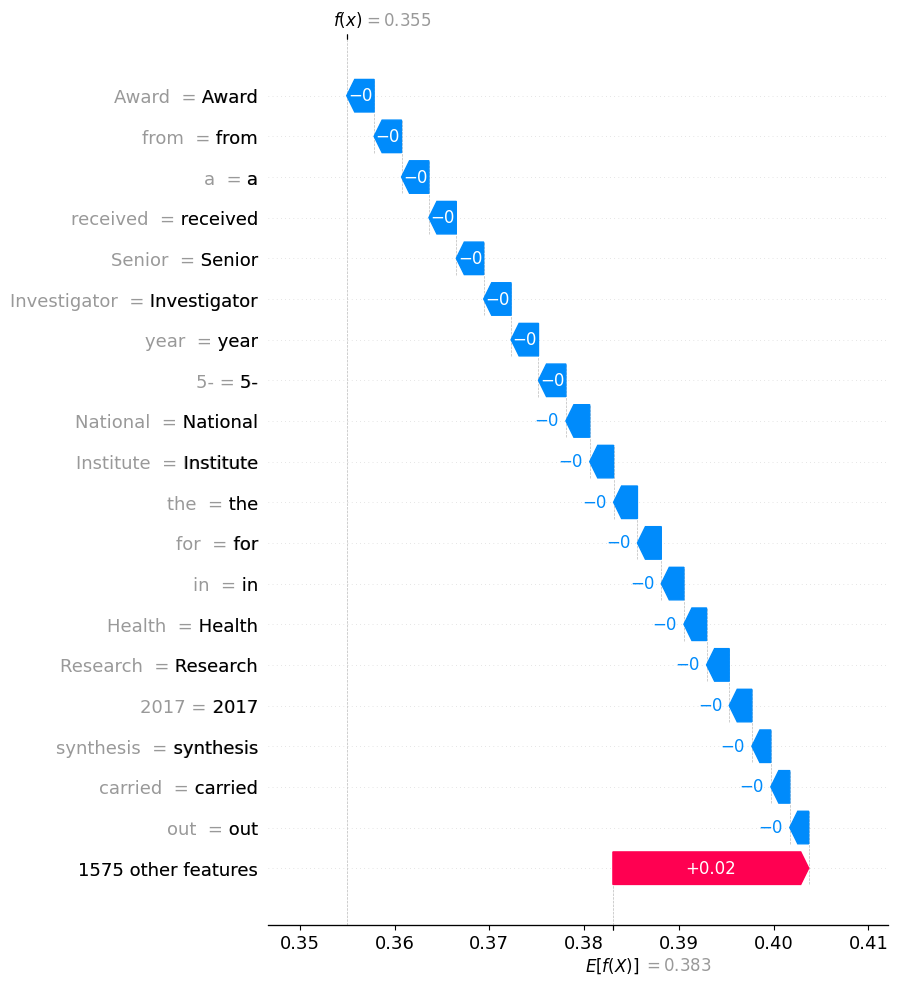

In [ ]:
shap.plots.waterfall(shap_values[0][:, 2], max_display=20)

In [ ]:
class_names = ['Class_0', 'Class_1', 'Class_2']  # Replace with your actual class names

# Generate and print the classification report
report = classification_report(y_test, y_test_pred, target_names=class_names)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

     Class_0       0.53      0.21      0.30        43
     Class_1       0.70      0.89      0.78       264
     Class_2       0.55      0.29      0.38        98

    accuracy                           0.67       405
   macro avg       0.59      0.46      0.49       405
weighted avg       0.64      0.67      0.63       405



In [ ]:
feature_columns = [
    'Mean Similarity of Adjacent Sentences', 'Variation in Similarity of Adjacent Sentences',
    'Mean Similarity Across All Sentence Pairs', 'Variation in Similarity Across All Sentence Pairs',
    'Mean Similarity of Adjacent Paragraphs', 'Variation in Similarity of Adjacent Paragraphs',
    'Mean Similarity Across All Paragraph Pairs', 'Variation in Similarity Across All Paragraph Pairs',
    'Flesch Reading Ease', 'SMOG Index', 'Automated Readability Index',
    'Dale Chall Readability Score', 'Sentiment Score', 'Noun Count', 'Verb Count',
    'Adjective Count', 'Adverb Count', 'Conjunction Count', 'Foreign Word Count',
    'Paragraph Count', 'Sentence Count', 'Word Count', 'Transition Word Count',
    'Referential Cohesion', 'Average Word Length', 'Average Sentence Length',
    'Average Words per Sentence', 'Number of Stopwords', 'Lexical Sophistication',
    'Lexical Density', 'Transition to sentence ratio', 'Transition to paragraph ratio',
    'Bigram Count', 'Trigram Count']

from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import accuracy_score
import numpy as np

X_train_embeddings = np.vstack(train_df["gpt_embedding"].values)
X_test_embeddings = np.vstack(test_df["gpt_embedding"].values)

X_train_additional = train_df[feature_columns].values
X_test_additional = test_df[feature_columns].values

X_train_combined = np.hstack([X_train_embeddings, X_train_additional])
X_test_combined = np.hstack([X_test_embeddings, X_test_additional])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_combined)
X_test_scaled = scaler.transform(X_test_combined)

In [ ]:
from sklearn.utils.class_weight import compute_sample_weight

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the objective function for Optuna
def objective(trial):
    param = {
        'verbosity': 0,
        'objective': 'multi:softmax',
        'num_class': 3,
        'booster': 'gbtree',
        'eta': trial.suggest_float('eta', 0.01, 0.2, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 250),
        'subsample': trial.suggest_float('subsample', 0.5, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1),
        'gamma': trial.suggest_float('gamma', 0.0, 5),
        'alpha': trial.suggest_float('alpha', 0.01, 1.0, log=True),
        'lambda': trial.suggest_float('lambda', 0.01, 1.0, log=True),
        'eval_metric': 'mlogloss',
        'tree_method': 'gpu_hist',
        'gpu_id': 0
    }

    model = XGBClassifier(**param)


    scores = cross_val_score(model, X_train_scaled, y_train, cv=cv,
                             scoring='f1_macro')

    return scores.mean()

# Optimize hyperparameters with Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

best_params = study.best_trial.params

# Train final model
final_model = XGBClassifier(**best_params, tree_method='gpu_hist', gpu_id=0, use_label_encoder=False)
final_model.fit(X_train_scaled, y_train)

# Save the model
joblib.dump(final_model, 'best_model.pkl')

# Predict and evaluate
y_test_pred = final_model.predict(X_test_scaled)
test_macro_f1 = f1_score(y_test, y_test_pred, average='macro')
print("Test Macro F1 Score: {}".format(test_macro_f1))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)

plt.title('Weighted XGBoost with OpenAI embeddings and Handcrafted Features on Original Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

[I 2024-09-07 21:33:59,731] A new study created in memory with name: no-name-4736bb18-f418-44d5-b063-10353c872950
[I 2024-09-07 21:34:05,981] Trial 0 finished with value: 0.20398009950248755 and parameters: {'eta': 0.11844771846351697, 'n_estimators': 491, 'learning_rate': 0.6610041383264823, 'max_depth': 10, 'min_child_weight': 232, 'subsample': 0.694821176332823, 'colsample_bytree': 0.5994172894715403, 'gamma': 0.0716826078974453, 'alpha': 0.015294506351792124, 'lambda': 0.020353848449494748}. Best is trial 0 with value: 0.20398009950248755.
[W 2024-09-07 21:34:11,948] Trial 1 failed with parameters: {'eta': 0.1916382227823144, 'n_estimators': 882, 'learning_rate': 0.339175778095818, 'max_depth': 10, 'min_child_weight': 213, 'subsample': 0.5398208439460889, 'colsample_bytree': 0.6903010671207268, 'gamma': 0.743333387215161, 'alpha': 0.01710846467184386, 'lambda': 0.03691321577193193} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/

In [ ]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 39.4 MB/s eta 0:00:00


In [ ]:
import shap
import numpy as np

text = test_df["cleaned text"].iloc[0]
embedding = get_embedding(text, model="text-embedding-3-large")


features = handcrafted_features(text)

features


{'Sentiment Score': 0.22577203810214996,
 'Noun Count': 625,
 'Verb Count': 227,
 'Adjective Count': 98,
 'Adverb Count': 38,
 'Conjunction Count': 63,
 'Foreign Word Count': 0,
 'Paragraph Count': 5,
 'Sentence Count': 45,
 'Word Count': 1718,
 'Transition Word Count': 7,
 'Referential Cohesion': 0.0496,
 'Average Word Length': 5.015715948777649,
 'Average Sentence Length': 34.977777777777774,
 'Average Words per Sentence': 38.17777777777778,
 'Number of Stopwords': 556,
 'Lexical Sophistication': 0.21420256111757857,
 'Lexical Density': 0.5750873108265425,
 'Transition to sentence ratio': 0.15555555555555556,
 'Transition to paragraph ratio': 1.4,
 'Bigram Count': 1371,
 'Trigram Count': 1610}

In [ ]:
class_names = ['Class_0', 'Class_1', 'Class_2']  # Replace with your actual class names

# Generate and print the classification report
report = classification_report(y_test, y_test_pred, target_names=class_names)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

     Class_0       0.80      0.28      0.41        43
     Class_1       0.71      0.91      0.80       264
     Class_2       0.57      0.31      0.40        98

    accuracy                           0.69       405
   macro avg       0.69      0.50      0.54       405
weighted avg       0.68      0.69      0.66       405



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
import numpy as np
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.decomposition import TruncatedSVD

feature_columns = [
    'Mean Similarity of Adjacent Sentences', 'Variation in Similarity of Adjacent Sentences',
    'Mean Similarity Across All Sentence Pairs', 'Variation in Similarity Across All Sentence Pairs',
    'Mean Similarity of Adjacent Paragraphs', 'Variation in Similarity of Adjacent Paragraphs',
    'Mean Similarity Across All Paragraph Pairs', 'Variation in Similarity Across All Paragraph Pairs',
    'Flesch Reading Ease', 'SMOG Index', 'Automated Readability Index',
    'Dale Chall Readability Score', 'Sentiment Score', 'Noun Count', 'Verb Count',
    'Adjective Count', 'Adverb Count', 'Conjunction Count', 'Foreign Word Count',
    'Paragraph Count', 'Sentence Count', 'Word Count', 'Transition Word Count',
    'Referential Cohesion', 'Average Word Length', 'Average Sentence Length',
    'Average Words per Sentence', 'Number of Stopwords', 'Lexical Sophistication',
    'Lexical Density', 'Transition to sentence ratio', 'Transition to paragraph ratio',
    'Bigram Count', 'Trigram Count']

vectorizer = CountVectorizer()

X_train_bow = vectorizer.fit_transform(train_df["string"]).toarray()
X_test_bow = vectorizer.transform(test_df["string"]).toarray()

y_train = train_df["3 Class Labels"]
y_test = test_df["3 Class Labels"]

X_train_additional = train_df[feature_columns].values
X_test_additional = test_df[feature_columns].values

X_train_combined = np.hstack([X_train_bow, X_train_additional])
X_test_combined = np.hstack([X_test_bow, X_test_additional])


X_train_scaled = X_train_additional
X_test_scaled = X_test_additional


[I 2024-09-10 00:44:54,343] A new study created in memory with name: no-name-c66b2e41-8af4-4344-8ba0-ae7033ee59b6
[I 2024-09-10 00:45:01,537] Trial 0 finished with value: 0.5617591031367981 and parameters: {'eta': 0.03660092922832148, 'n_estimators': 694, 'learning_rate': 0.4479147197461589, 'max_depth': 5, 'min_child_weight': 96, 'subsample': 0.753513993230368, 'colsample_bytree': 0.6771696294771727, 'gamma': 0.8536867405024062, 'alpha': 0.09010649932769511, 'lambda': 0.010848814381816223}. Best is trial 0 with value: 0.5617591031367981.
[I 2024-09-10 00:45:08,147] Trial 1 finished with value: 0.6344795124016219 and parameters: {'eta': 0.011539052441747015, 'n_estimators': 722, 'learning_rate': 0.3164633333557139, 'max_depth': 6, 'min_child_weight': 3, 'subsample': 0.6166450571013475, 'colsample_bytree': 0.8061638013321588, 'gamma': 3.4472131772991874, 'alpha': 0.5016085843044837, 'lambda': 0.07526725306556377}. Best is trial 1 with value: 0.6344795124016219.
[I 2024-09-10 00:45:13,46

Test Macro F1 Score: 0.4006006906629897


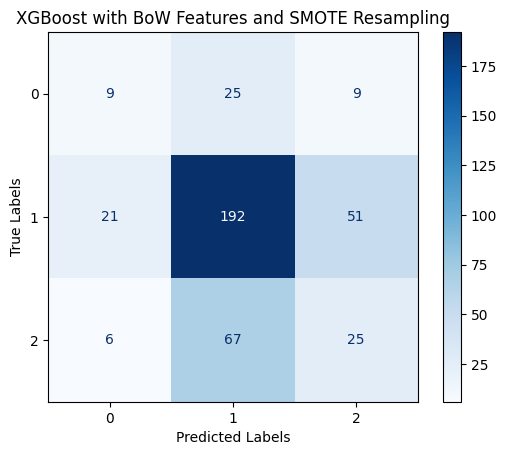

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, StratifiedKFold
from xgboost import XGBClassifier
import optuna
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, make_scorer

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def objective(trial):
    param = {
        'verbosity': 0,
        'objective': 'multi:softmax',
        'num_class': 3,
        'booster': 'gbtree',
        'eta': trial.suggest_float('eta', 0.01, 0.2, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 250),
        'subsample': trial.suggest_float('subsample', 0.5, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1),
        'gamma': trial.suggest_float('gamma', 0.0, 5),
        'alpha': trial.suggest_float('alpha', 0.01, 1.0, log=True),
        'lambda': trial.suggest_float('lambda', 0.01, 1.0, log=True),
        'eval_metric': 'mlogloss',
        'tree_method': 'hist',
        'device': 'cuda',
    }

    model = XGBClassifier(**param)


    f1_scorer = make_scorer(f1_score, average='macro')

    fold_f1_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring=f1_scorer)

    mean_f1_score = np.mean(fold_f1_scores)

    return mean_f1_score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

best_params = study.best_trial.params

final_model = XGBClassifier(**best_params, tree_method='gpu_hist', gpu_id=0, use_label_encoder=False)

final_model.fit(X_train_scaled, y_train)

joblib.dump(final_model, 'best_model.pkl')

y_test_pred = final_model.predict(X_test_scaled)
test_macro_f1 = f1_score(y_test, y_test_pred, average='macro')
print("Test Macro F1 Score: {}".format(test_macro_f1))

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)

plt.title('XGBoost with BoW Features and SMOTE Resampling')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Test Macro F1 Score: 0.4185386168200531


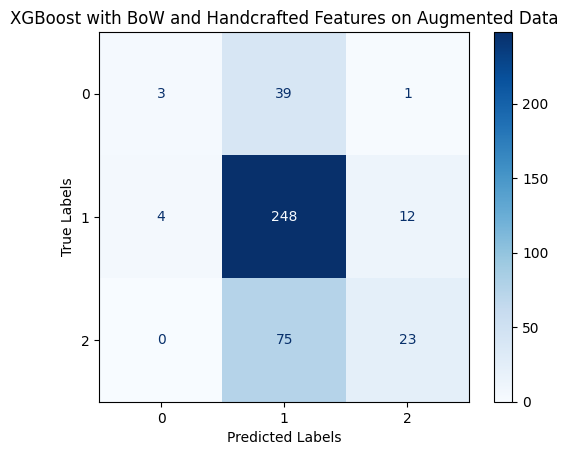

In [ ]:
y_test_pred = final_model.predict(X_test_scaled)
test_macro_f1 = f1_score(y_test, y_test_pred, average='macro')
print("Test Macro F1 Score: {}".format(test_macro_f1))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)

plt.title('XGBoost with BoW and Handcrafted Features on Augmented Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:

class_names = ['Class_0', 'Class_1', 'Class_2']  # Replace with your actual class names

# Generate and print the classification report
report = classification_report(y_test, y_test_pred, target_names=class_names)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

     Class_0       0.10      0.05      0.06        43
     Class_1       0.65      0.81      0.72       264
     Class_2       0.26      0.14      0.19        98

    accuracy                           0.57       405
   macro avg       0.34      0.33      0.32       405
weighted avg       0.50      0.57      0.52       405



In [ ]:
from transformers import LongformerModel, LongformerTokenizer
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = LongformerModel.from_pretrained('allenai/longformer-base-4096').to(device)
tokenizer = LongformerTokenizer.from_pretrained('allenai/longformer-base-4096')

def get_longformer_embeddings(text):
    inputs = tokenizer(text, return_tensors="pt", max_length=4096, truncation=True, padding=True)
    inputs = {key: value.to(device) for key, value in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)

    embeddings = outputs.last_hidden_state.mean(dim=1)

    return embeddings.squeeze().cpu().numpy()



/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
from tqdm.notebook import tqdm
import numpy as np

tqdm.pandas()

train_df['bert_embeddings'] = train_df['cleaned text'].progress_apply(lambda x: get_longformer_embeddings(x))
test_df['bert_embeddings'] = test_df['cleaned text'].progress_apply(lambda x: get_longformer_embeddings(x))



  0%|          | 0/1395 [00:00<?, ?it/s]

  0%|          | 0/405 [00:00<?, ?it/s]

In [ ]:
from tqdm.notebook import tqdm

tqdm.pandas()

def text_to_embedding(tokens, model):
    embeddings = [model[word] for word in tokens if word in model]
    if len(embeddings) == 0:
        return np.zeros(model.vector_size)  # Return a zero vector if no valid words
    return np.mean(embeddings, axis=0)

train_df['embeddings'] = train_df['word tokenized'].progress_apply(lambda tokens: text_to_embedding(tokens, fasttext_model))

test_df['embeddings'] = test_df['word tokenized'].progress_apply(lambda tokens: text_to_embedding(tokens, fasttext_model))


  0%|          | 0/1395 [00:00<?, ?it/s]

  0%|          | 0/405 [00:00<?, ?it/s]

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

feature_columns = [
    'Mean Similarity of Adjacent Sentences', 'Variation in Similarity of Adjacent Sentences',
    'Mean Similarity Across All Sentence Pairs', 'Variation in Similarity Across All Sentence Pairs',
    'Mean Similarity of Adjacent Paragraphs', 'Variation in Similarity of Adjacent Paragraphs',
    'Mean Similarity Across All Paragraph Pairs', 'Variation in Similarity Across All Paragraph Pairs',
    'Flesch Reading Ease', 'SMOG Index', 'Automated Readability Index',
    'Dale Chall Readability Score', 'Sentiment Score', 'Noun Count', 'Verb Count',
    'Adjective Count', 'Adverb Count', 'Conjunction Count', 'Foreign Word Count',
    'Paragraph Count', 'Sentence Count', 'Word Count', 'Transition Word Count',
    'Referential Cohesion', 'Average Word Length', 'Average Sentence Length',
    'Average Words per Sentence', 'Number of Stopwords', 'Lexical Sophistication',
    'Lexical Density', 'Transition to sentence ratio', 'Transition to paragraph ratio',
    'Bigram Count', 'Trigram Count']


train_embeddings = np.vstack(train_df['bert_embeddings'].values)
test_embeddings = np.vstack(test_df['bert_embeddings'].values)

print(f"Train embeddings shape: {train_embeddings.shape}")
print(f"Test embeddings shape: {test_embeddings.shape}")

y_train = train_df["3 Class Labels"]
y_test = test_df["3 Class Labels"]

X_train_additional = train_df[feature_columns].values
X_test_additional = test_df[feature_columns].values

X_train_combined = np.hstack([train_embeddings, X_train_additional])
X_test_combined = np.hstack([test_embeddings, X_test_additional])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_combined)
X_test_scaled = scaler.transform(X_test_combined)

X_train_scaled = train_embeddings

X_test_scaled = test_embeddings




Train embeddings shape: (1395, 768)
Test embeddings shape: (405, 768)


[I 2024-09-10 00:31:44,493] A new study created in memory with name: no-name-121fadc1-b3d7-45ae-9f1c-af1ba849540c
[I 2024-09-10 00:31:52,602] Trial 0 finished with value: 0.656625933824408 and parameters: {'eta': 0.03565058087437298, 'n_estimators': 713, 'learning_rate': 0.048318065888135926, 'max_depth': 3, 'min_child_weight': 185, 'subsample': 0.910838511243047, 'colsample_bytree': 0.817539269561666, 'gamma': 3.6523462142831415, 'alpha': 0.20936345658798639, 'lambda': 0.19814400010564673}. Best is trial 0 with value: 0.656625933824408.
[I 2024-09-10 00:32:04,760] Trial 1 finished with value: 0.7441442310340929 and parameters: {'eta': 0.1084291823117538, 'n_estimators': 675, 'learning_rate': 0.06427056162614295, 'max_depth': 5, 'min_child_weight': 63, 'subsample': 0.7176785038587776, 'colsample_bytree': 0.791661559933537, 'gamma': 0.022068799968671393, 'alpha': 0.6942358470299872, 'lambda': 2.055033632589574}. Best is trial 1 with value: 0.7441442310340929.
[I 2024-09-10 00:32:16,055]

Test Macro F1 Score: 0.5508635129671345


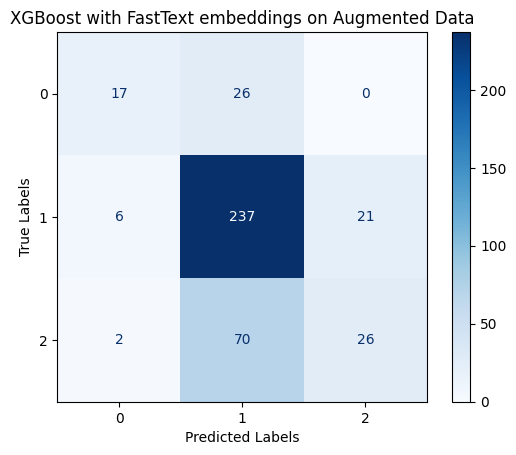

In [ ]:
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier, DMatrix, train as xgb_train
import optuna
from optuna.integration import XGBoostPruningCallback
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


def objective(trial):
    param = {
        'verbosity': 0,
        'objective': 'multi:softmax',
        'num_class': 3,
        'booster': 'gbtree',
        'eta': trial.suggest_float('eta', 0.01, 0.2, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 7),
        'min_child_weight': trial.suggest_int('min_child_weight', 5, 250),
        'subsample': trial.suggest_float('subsample', 0.5, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1),
        'gamma': trial.suggest_float('gamma', 0.0, 5),
        'alpha': trial.suggest_float('alpha', 0.01, 1.0, log=True),
        'lambda': trial.suggest_float('lambda', 0.1, 10.0, log=True),
        'eval_metric': 'mlogloss',
        'tree_method': 'gpu_hist',
        'gpu_id': 0
    }

    model = XGBClassifier(**param)

    scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='f1_macro')

    return scores.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

best_params = study.best_trial.params

final_model = XGBClassifier(**best_params, tree_method='gpu_hist', gpu_id=0, use_label_encoder=False)

final_model.fit(X_train_scaled, y_train)

joblib.dump(final_model, 'best_model.pkl')

y_test_pred = final_model.predict(X_test_scaled)

test_macro_f1 = f1_score(y_test, y_test_pred, average='macro')
print("Test Macro F1 Score: {}".format(test_macro_f1))

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)

plt.title('XGBoost with FastText embeddings on Augmented Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')


plt.show()

In [ ]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 36.4 MB/s eta 0:00:00


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import numpy as np
import shap

from nltk.tokenize import word_tokenize
from tqdm import tqdm
import numpy as np

class EmbeddingTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, word_embedding_model):
        self.word_embedding_model = word_embedding_model

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Tokenize each string before transforming to embeddings
        tokenized_X = [word_tokenize(text) if isinstance(text, str) else text for text in X]

        # Apply the text_to_embedding function to each tokenized sequence
        return np.array([text_to_embedding(tokens, self.word_embedding_model) for tokens in tqdm(tokenized_X, desc="Embedding Transformation")])

def text_to_embedding(tokens, model):
    embeddings = [model[word] for word in tokens if word in model]
    if len(embeddings) == 0:
        return np.zeros(model.vector_size)  # Return a zero vector if no valid words are found
    return np.mean(embeddings, axis=0)

# Example pipeline
pipeline = Pipeline([
    ('embedding', EmbeddingTransformer(word_embedding_model=fasttext_model)),  # Replace with actual word embedding model
    ('classifier', final_model)  # Replace final_model with your classifier
])


masker = shap.maskers.Text()

class_names = ['2-star, 1-star or Unclassified', '3-star', '4-star']

explainer = shap.Explainer(pipeline.predict_proba, masker=masker, output_names = class_names)

shap_values = explainer([test_df["string"][10]])  # Assuming the text is tokenized using split()

shap.plots.text(shap_values[0])

Embedding Transformation: 100%|██████████| 4/4 [00:00<00:00, 1361.35it/s]


In [ ]:
class EmbeddingTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Transform each text in X to Longformer embeddings
        return np.array([get_longformer_embeddings(text) for text in tqdm(X, desc="Embedding Transformation")])

# Example pipeline with the Longformer embeddings
pipeline = Pipeline([
    ('embedding', EmbeddingTransformer()),  # Use Longformer embeddings
    ('classifier', final_model)  # Replace final_model with your classifier
])

# SHAP explainer setup
masker = shap.maskers.Text()

class_names = ['2-star, 1-star or Unclassified', '3-star', '4-star']

explainer = shap.Explainer(pipeline.predict_proba, masker=masker, output_names=class_names)

# Example SHAP analysis for one sample in test_df
shap_values = explainer([test_df["cleaned text"][10]])  # Assuming test_df["string"][2] contains the raw text

# Plot SHAP values
shap.plots.text(shap_values[0])

Embedding Transformation: 100%|██████████| 6/6 [00:00<00:00, 21.85it/s]


  0%|          | 0/498 [00:00<?, ?it/s]


Embedding Transformation: 100%|██████████| 6/6 [00:00<00:00, 21.74it/s]

Embedding Transformation: 100%|██████████| 6/6 [00:00<00:00, 25.31it/s]

Embedding Transformation: 100%|██████████| 6/6 [00:00<00:00, 24.74it/s]

Embedding Transformation: 100%|██████████| 6/6 [00:00<00:00, 24.23it/s]

Embedding Transformation: 100%|██████████| 6/6 [00:00<00:00, 20.95it/s]

Embedding Transformation: 100%|██████████| 6/6 [00:00<00:00, 24.34it/s]

Embedding Transformation: 100%|██████████| 6/6 [00:00<00:00, 24.51it/s]

Embedding Transformation: 100%|██████████| 6/6 [00:00<00:00, 24.74it/s]

Embedding Transformation: 100%|██████████| 6/6 [00:00<00:00, 20.07it/s]

Embedding Transformation: 100%|██████████| 6/6 [00:00<00:00, 16.84it/s]

Embedding Transformation: 100%|██████████| 6/6 [00:00<00:00, 24.31it/s]

Embedding Transformation: 100%|██████████| 6/6 [00:00<00:00, 25.05it/s]

Embedding Transformation: 100%|██████████| 6/6 [00:00<00:00, 23.62it/s]

Embedding Transformation: 100%|██████████| 6/6 [00

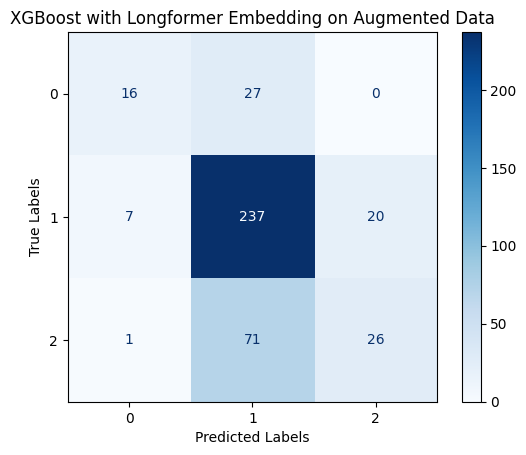

In [ ]:

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)

plt.title('XGBoost with Longformer Embedding on Augmented Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')


plt.show()